In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

In [4]:
file_path = '/workspaces/STdata_prediction/src/ST-graph/input/graph_sensor_locations.csv'

In [6]:
data = pd.read_csv(file_path)
indexes = data['index']
sensor_ids = data['sensor_id']
latitudes = data['latitude']
longitudes = data['longitude']

In [7]:
# データを用いた処理の例
# 例えば、経度と緯度を使って距離行列を計算する場合
def euclidean_distance(lat1, lon1, lat2, lon2):
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5

num_sensors = len(indexes)
distance_matrix = np.zeros((num_sensors, num_sensors))

for i in range(num_sensors):
    for j in range(num_sensors):
        if i != j:
            distance_matrix[i, j] = euclidean_distance(latitudes[i], longitudes[i], latitudes[j], longitudes[j])

print(distance_matrix)

[[0.         0.08916517 0.08889816 ... 0.16189761 0.05638761 0.05235642]
 [0.08916517 0.         0.00028284 ... 0.24681549 0.1410134  0.08063348]
 [0.08889816 0.00028284 0.         ... 0.24657967 0.14076997 0.08047038]
 ...
 [0.16189761 0.24681549 0.24657967 ... 0.         0.10622858 0.17410085]
 [0.05638761 0.1410134  0.14076997 ... 0.10622858 0.         0.0750462 ]
 [0.05235642 0.08063348 0.08047038 ... 0.17410085 0.0750462  0.        ]]


In [8]:
# Find the index of the smallest distance (excluding the diagonal)
min_distance = np.inf
min_index = (None, None)

for i in range(num_sensors):
    for j in range(i + 1, num_sensors):  # Start from i+1 to avoid the diagonal
        if distance_matrix[i, j] < min_distance:
            min_distance = distance_matrix[i, j]
            min_index = (i, j)

print(f"The smallest distance is between indexes {min_index[0]} and {min_index[1]} with a distance of {min_distance}")

The smallest distance is between indexes 191 and 192 with a distance of 0.0001523154621152438


In [11]:
# ファイルのパス
file_path = '/workspaces/STdata_prediction/src/LGnet/input/metr-la.h5'

# .h5ファイルの読み取り専用モードでの読み込み
with h5py.File(file_path, 'r') as f:
    # データセットのリストを取得
    dataset_list = list(f.keys())
    print("Available datasets:", dataset_list)

    # dfグループ内のデータセットを取得
    df_group = f['df']
    print(f"\nGroups and datasets in 'df': {list(df_group.keys())}\n")

    # 各データセットの内容を表示
    for key in df_group.keys():
        data = df_group[key][:]
        print(f"Dataset: {key}")
        print(data.shape)
        print("\n")

Available datasets: ['df']

Groups and datasets in 'df': ['axis0', 'axis1', 'block0_items', 'block0_values']

Dataset: axis0
(207,)


Dataset: axis1
(34272,)


Dataset: block0_items
(207,)


Dataset: block0_values
(34272, 207)




In [12]:
with h5py.File(file_path, 'r') as f:
    # dfグループ内のデータセットを取得
    df_group = f['df']

    # 各データセットを取得
    axis0 = df_group['axis0'][:]
    axis1 = df_group['axis1'][:]
    block0_items = df_group['block0_items'][:]
    block0_values = df_group['block0_values'][:]

    # DataFrameの作成
    df = pd.DataFrame(block0_values, index=axis1, columns=block0_items)

# DataFrameの表示
print(df.head())

                     b'773869'  b'767541'  b'767542'  b'717447'  b'717446'  \
1330560000000000000  64.375000  67.625000  67.125000  61.500000  66.875000   
1330560300000000000  62.666667  68.555556  65.444444  62.444444  64.444444   
1330560600000000000  64.000000  63.750000  60.000000  59.000000  66.500000   
1330560900000000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1330561200000000000   0.000000   0.000000   0.000000   0.000000   0.000000   

                     b'717445'  b'773062'  b'767620'  b'737529'  b'717816'  \
1330560000000000000  68.750000     65.125     67.125  59.625000  62.750000   
1330560300000000000  68.111111     65.000     65.000  57.444444  63.333333   
1330560600000000000  66.250000     64.500     64.250  63.875000  65.375000   
1330560900000000000   0.000000      0.000      0.000   0.000000   0.000000   
1330561200000000000   0.000000      0.000      0.000   0.000000   0.000000   

                     ...  b'772167'  b'769372'  b'774204'  b'7

In [13]:
def plot_graph(speed_values, start_index, end_index):
    plt.figure(figsize=(12, 8))
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用

    for i, idx in enumerate(range(start_index, end_index + 1)):
        if idx < speed_values.shape[1]:  # Ensure the index is within bounds
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Index {idx}', 
                     color=colors(i), alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Values from Index {start_index} to {end_index}')
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 100)
    plt.show()


/tmp/ipykernel_282411/2638802387.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


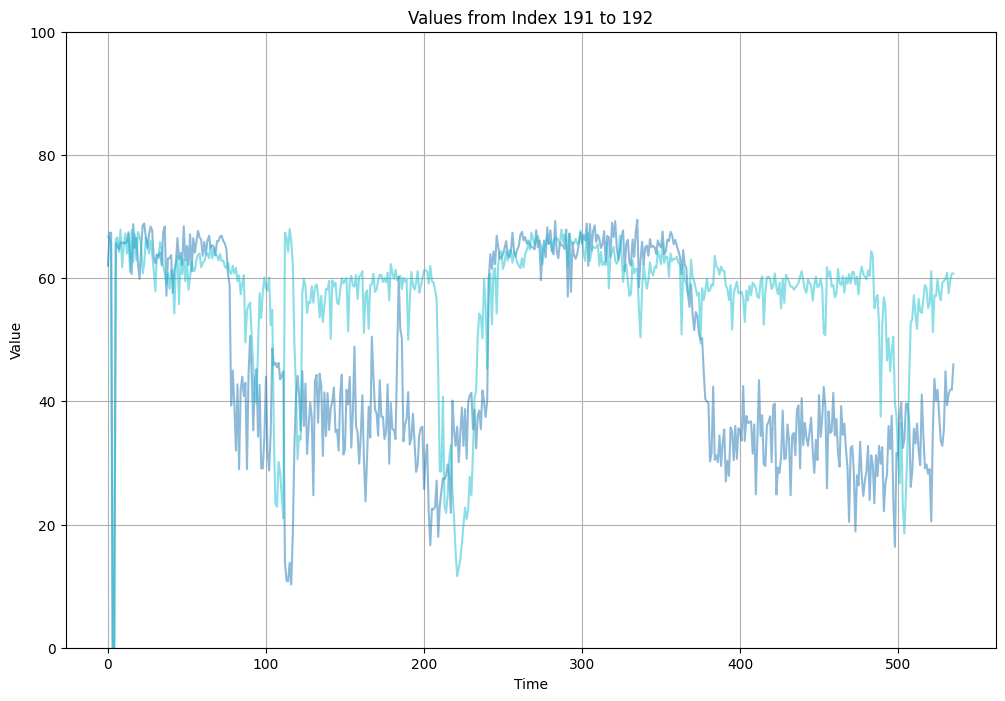

In [18]:
plot_graph(np.array_split(df, 64)[0], 191, 192)

In [33]:
from scipy.cluster.hierarchy import linkage, fcluster

# クラスタリングの実行
# 'ward'法はクラスタ間の分散が最小となるようにクラスタを結合する方法です
Z = linkage(distance_matrix, method='ward')

# クラスタ数を決定 (例: 2クラスタ)
num_clusters = 25
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# クラスタリング結果の表示
for i in range(num_clusters):
    cluster_indices = np.where(clusters == i + 1)[0]
    print(f"Cluster {i + 1}: {cluster_indices}")


Cluster 1: [60 63 75 76 81 82]
Cluster 2: [ 47  52  69  90  99 137 149]
Cluster 3: [150 180 181]
Cluster 4: [  9  26  41  43  77  84  88  89 104 130 131 146 158 197 204]
Cluster 5: [ 86  87 100 148 172]
Cluster 6: [  8  14  34  59 151 182 185 186]
Cluster 7: [ 23 124 165 174]
Cluster 8: [  6  33  38  91  93 136 138 144]
Cluster 9: [ 16  29  30  48  64  65 134 166 170 196]
Cluster 10: [  1   2  49  56  78 101 123 133 135 183 184]
Cluster 11: [  3   4   5  12  15  17  80 191 192 193]
Cluster 12: [  7  11  27  28  55  79  85  92 105 106 107 108 110 132 152 153 171 173
 177 178 179 201 202]
Cluster 13: [ 44  45 203]
Cluster 14: [ 18  21  35  50 200]
Cluster 15: [ 46  66 121 126 189]
Cluster 16: [ 22  36  39  57  67  68  74  98 102 103 117 118 119 140 175 199]
Cluster 17: [ 40  61  70  71  72 190 205]
Cluster 18: [ 10  31  73  83 113 122 141 156 164 176]
Cluster 19: [157 159 160 161 162 163 187 188 195]
Cluster 20: [19 20 32 94]
Cluster 21: [ 96  97 127 128 154 155 198 206]
Cluster 22: [ 13

/tmp/ipykernel_282411/1809888641.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


In [34]:
def plot_graphs_by_cluster(speed_values, clusters, num_clusters):
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', speed_values.shape[1])  # カラーマップを使用

    for cluster in range(1, num_clusters + 1):
        plt.figure(figsize=(12, 8))
        cluster_indices = np.where(clusters == cluster)[0]
        
        for idx in cluster_indices:
            values_index = speed_values.iloc[:, idx].values
            plt.plot(indices, values_index, linestyle='-', 
                     label=f'Index {idx}', 
                     color=colors(idx), alpha=0.5)

        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title(f'Cluster {cluster} Values')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 100)
        plt.show()

/tmp/ipykernel_282411/889443620.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', speed_values.shape[1])  # カラーマップを使用


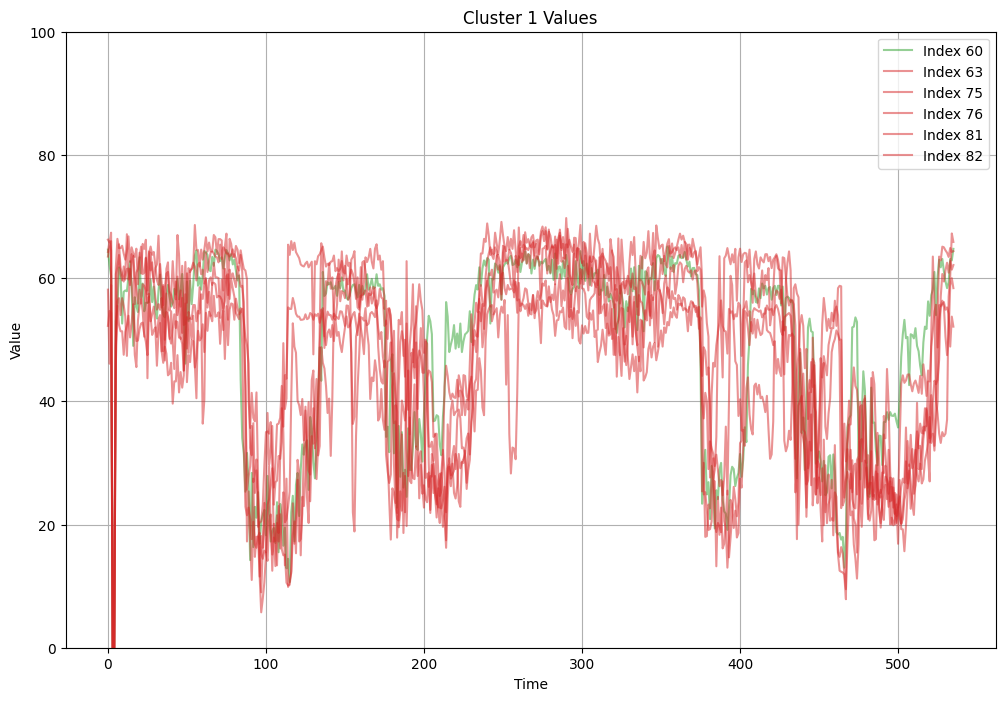

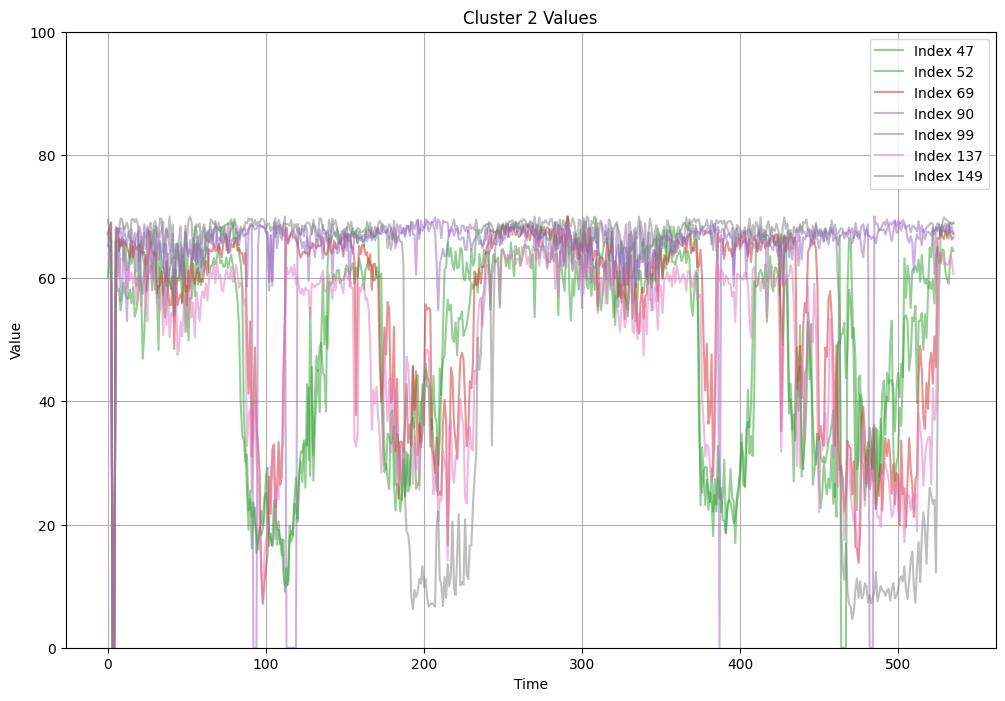

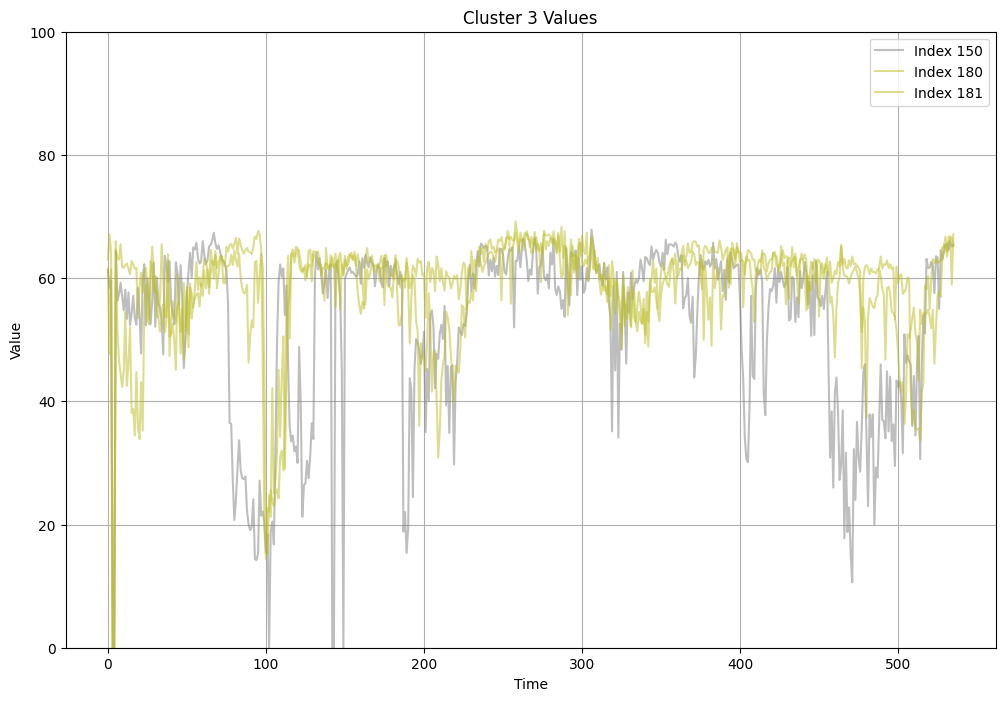

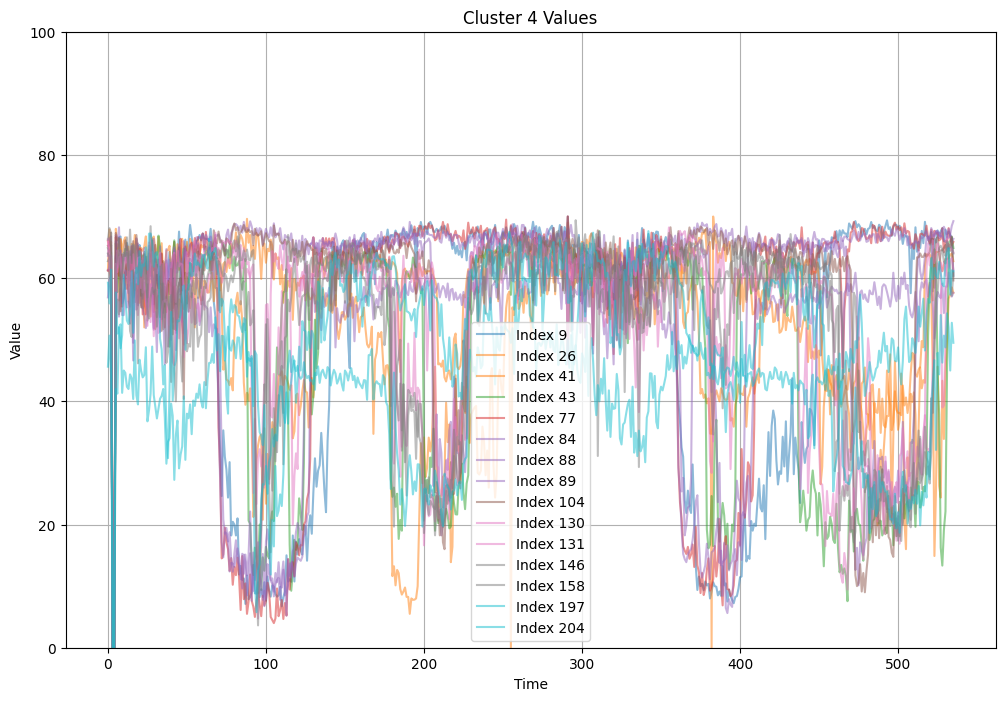

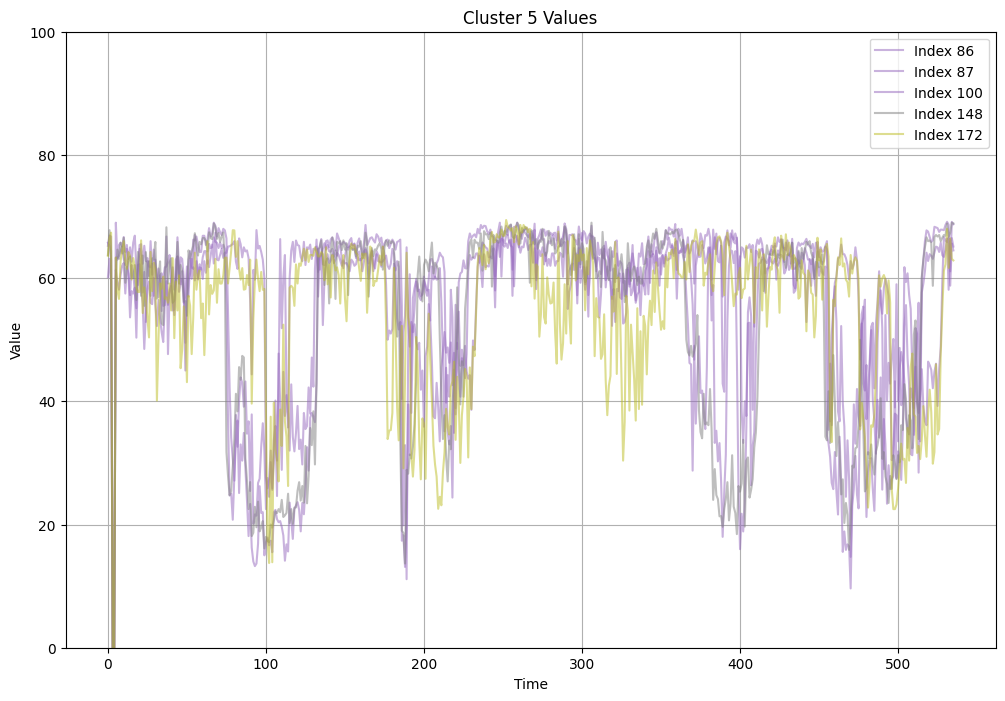

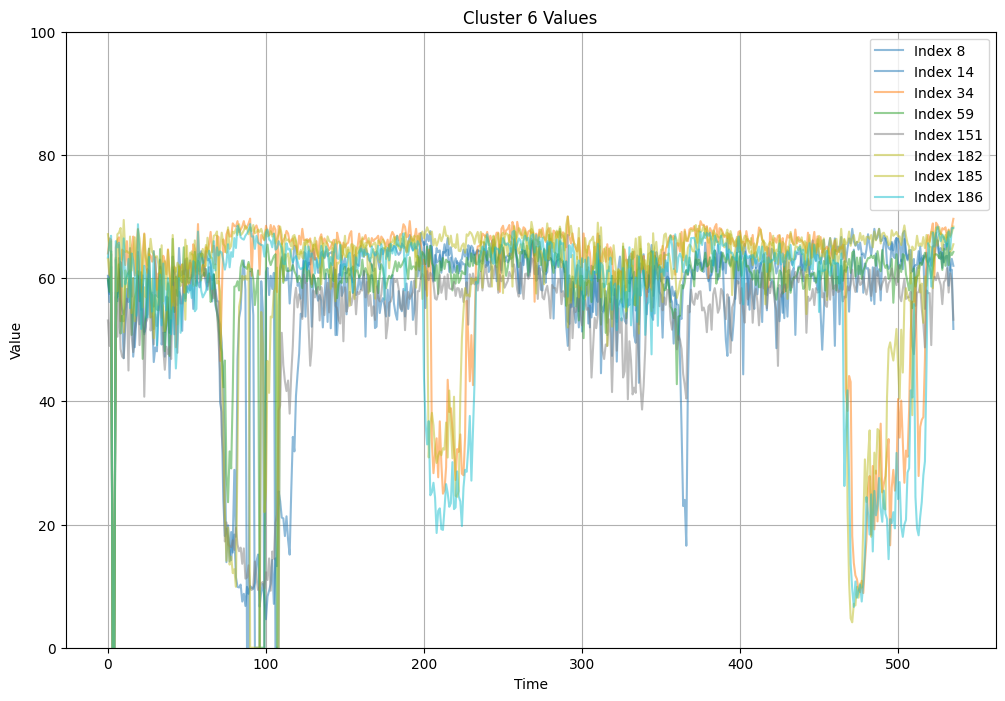

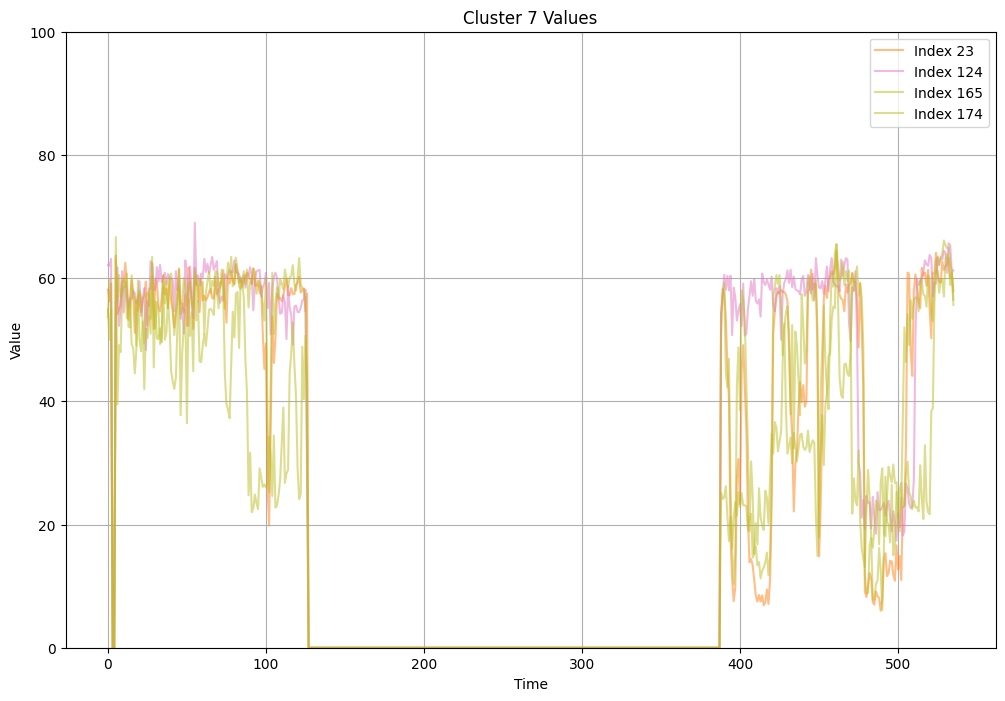

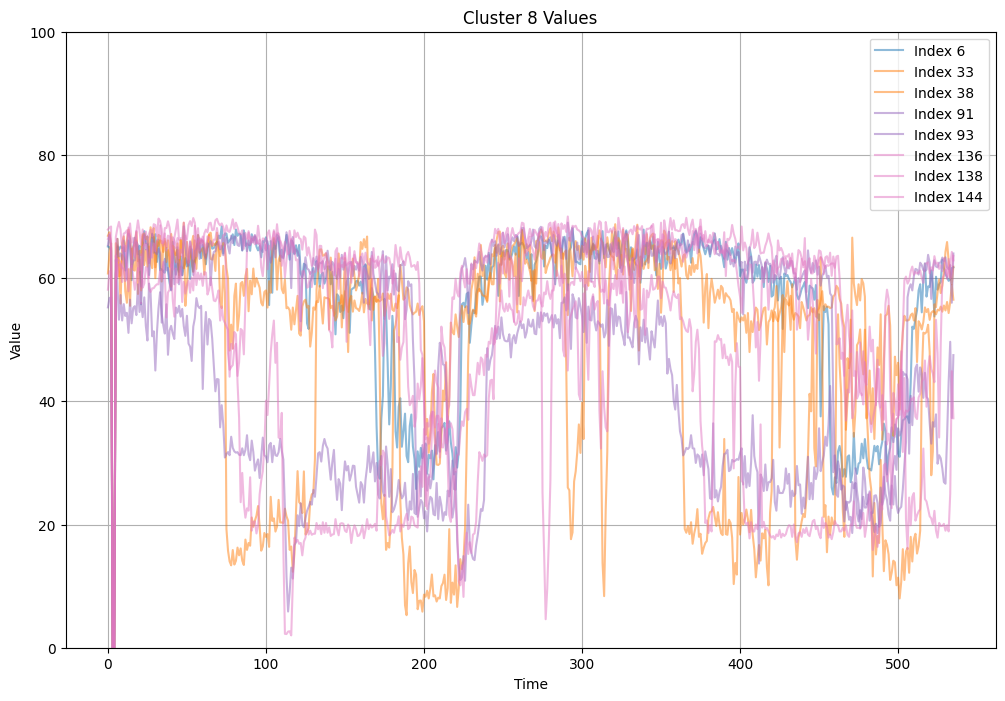

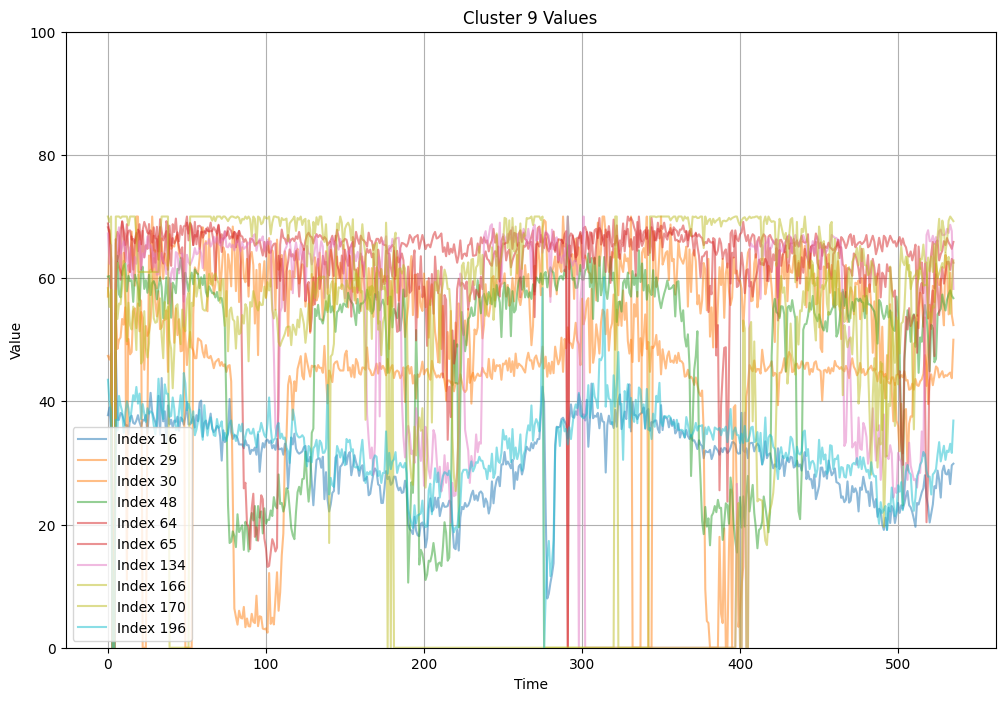

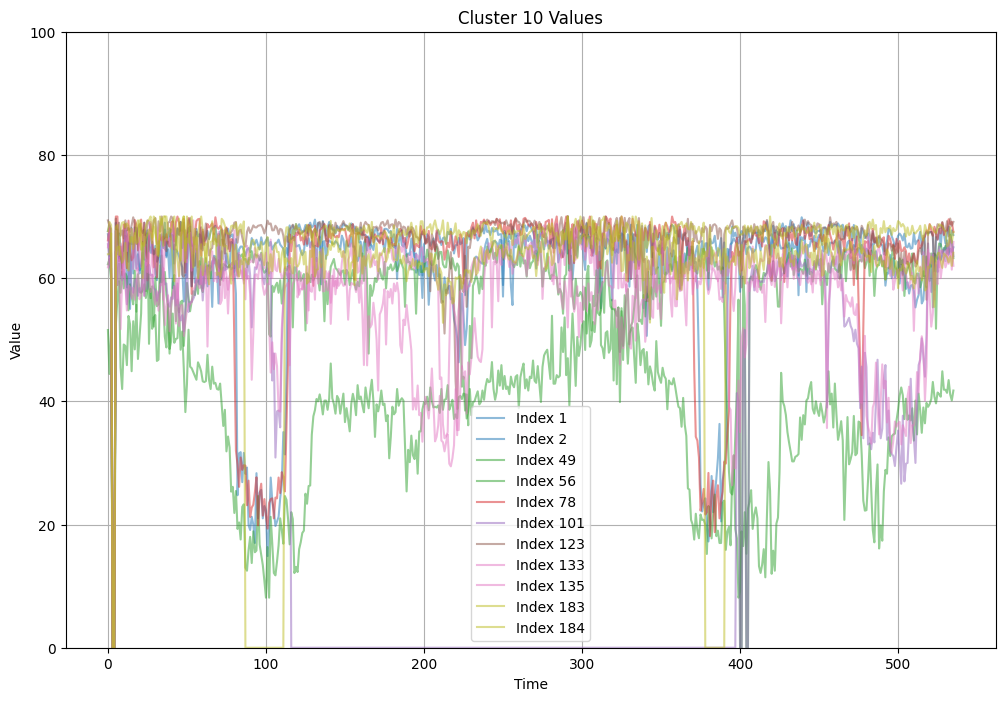

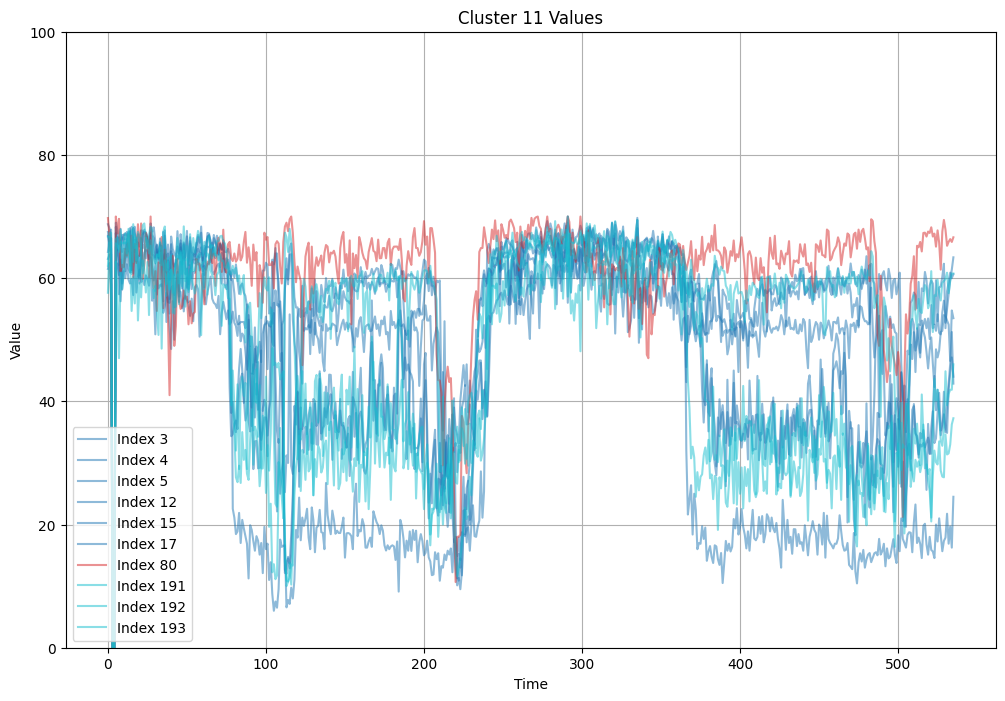

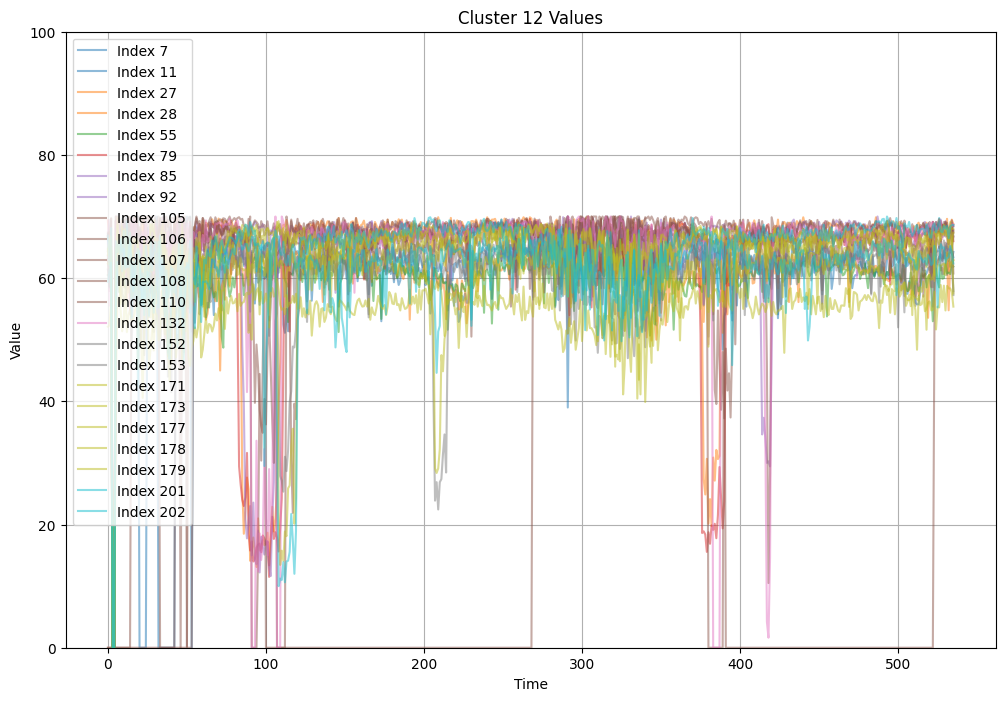

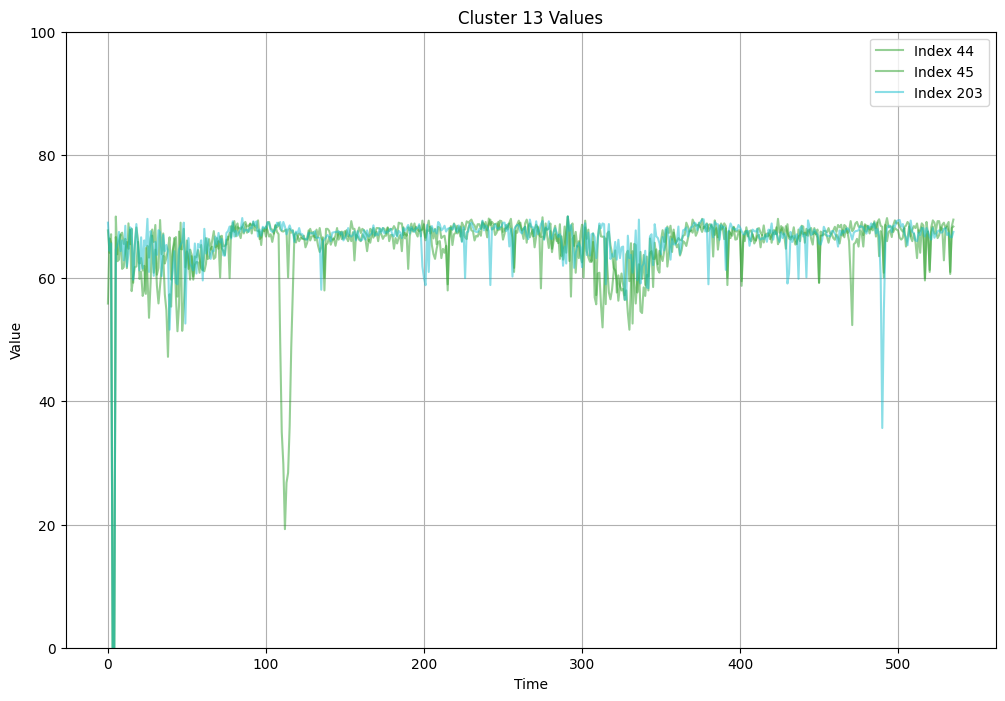

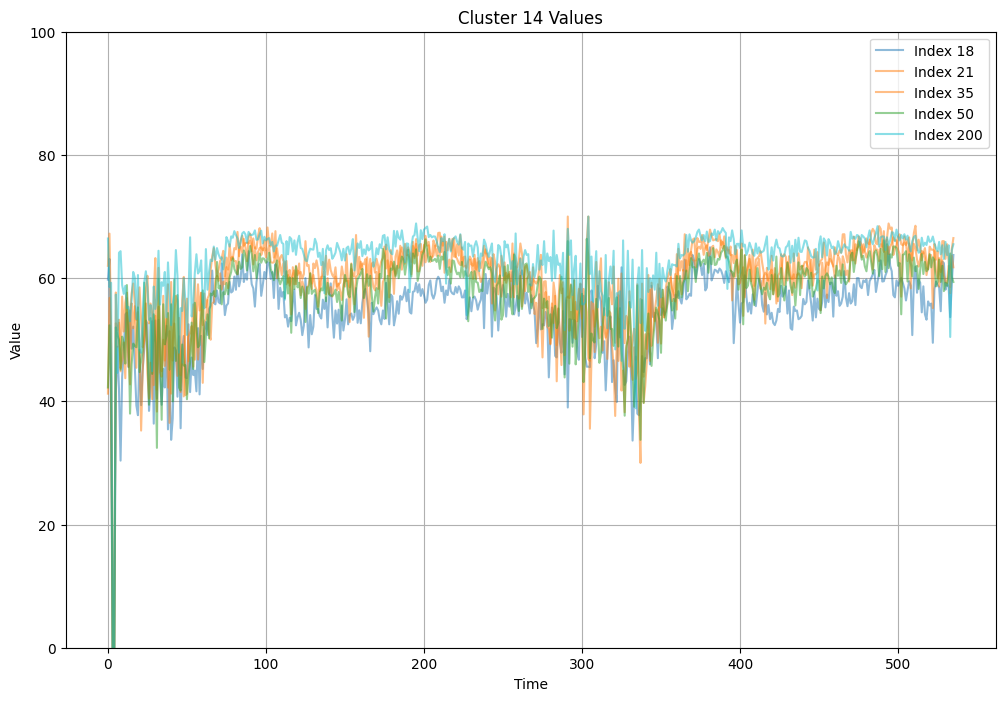

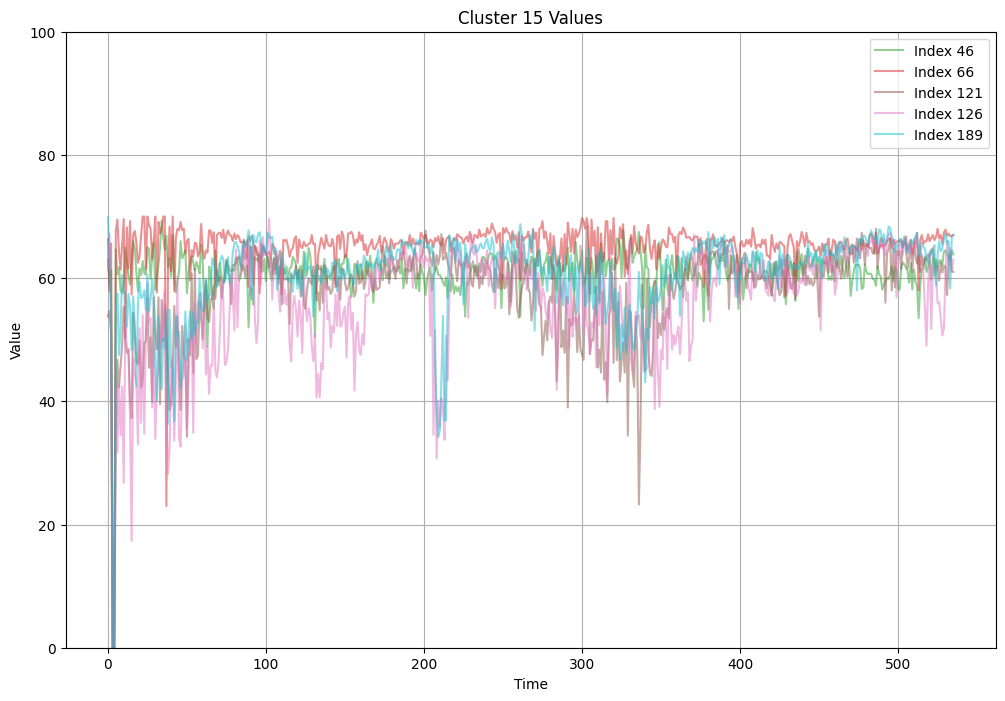

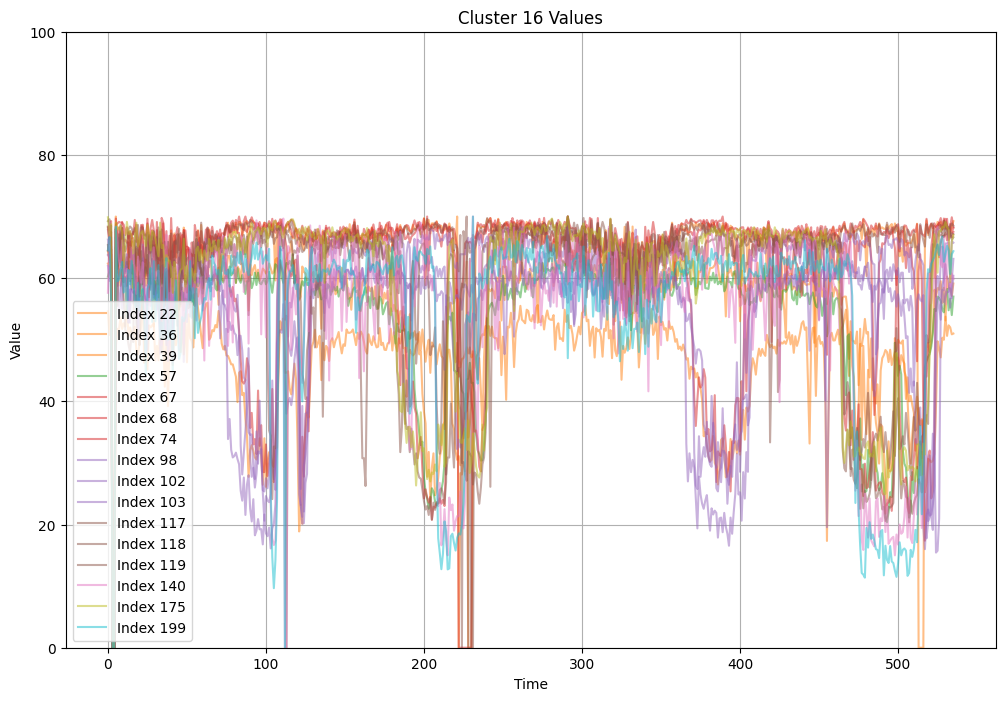

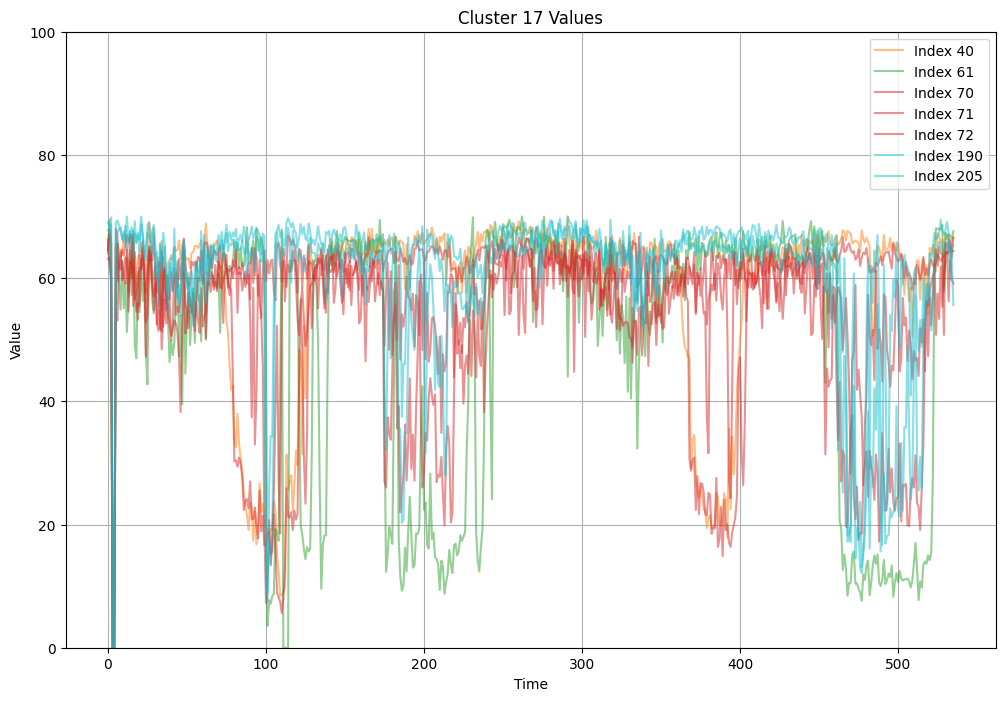

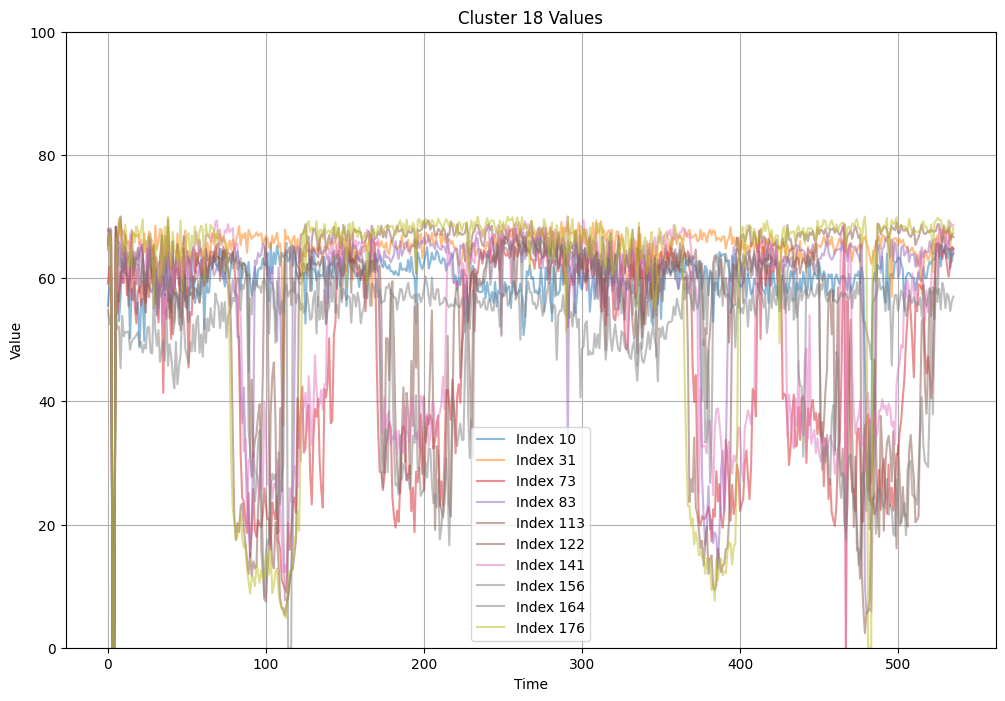

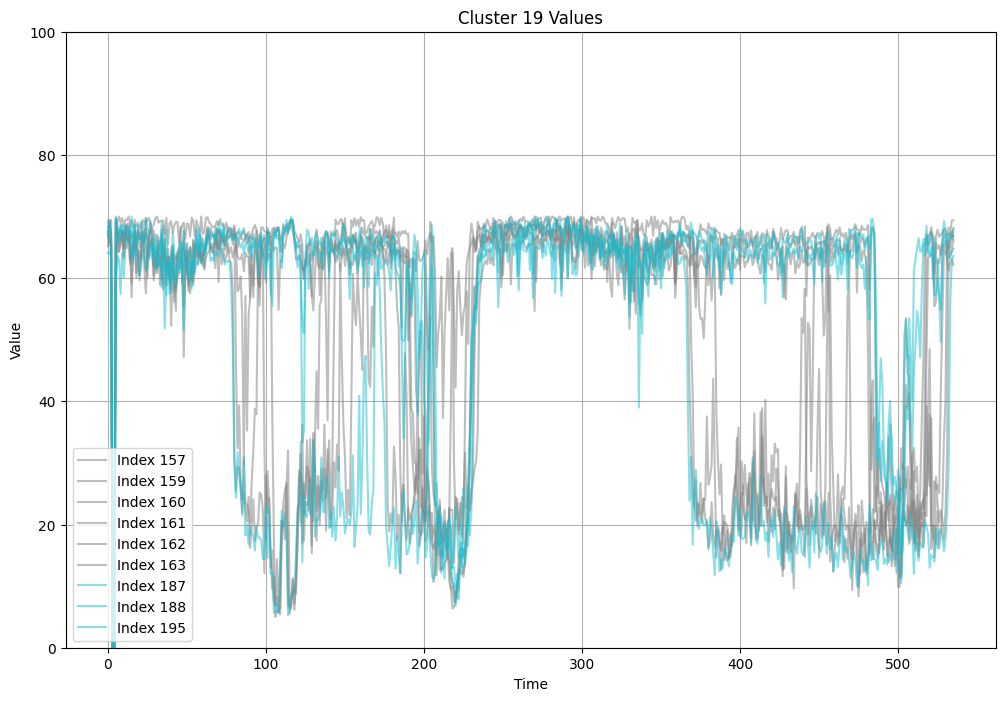

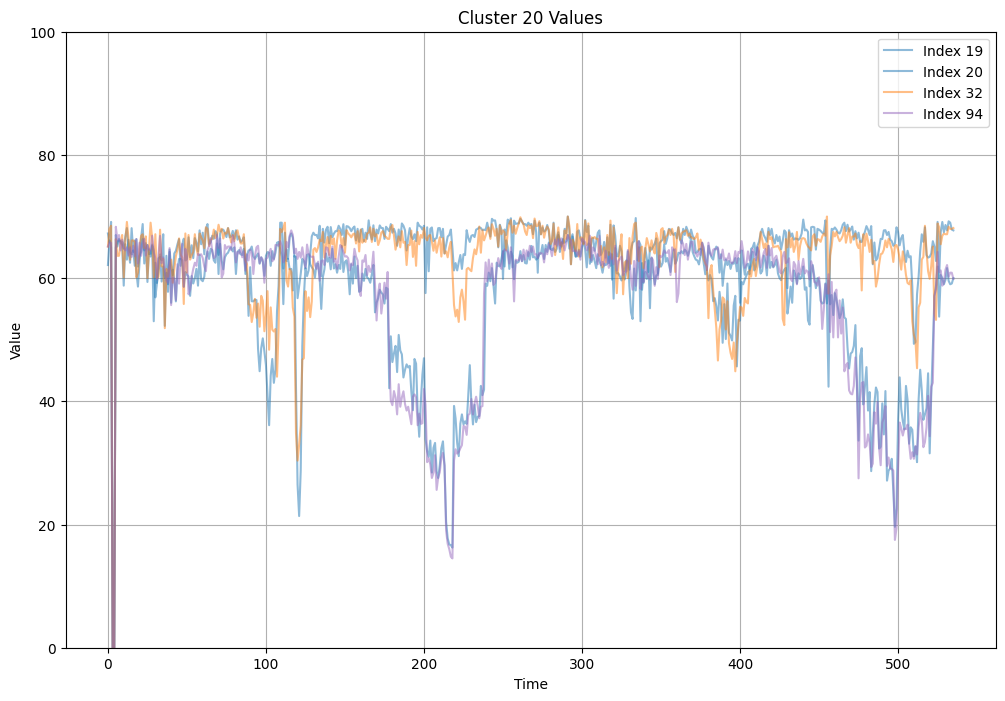

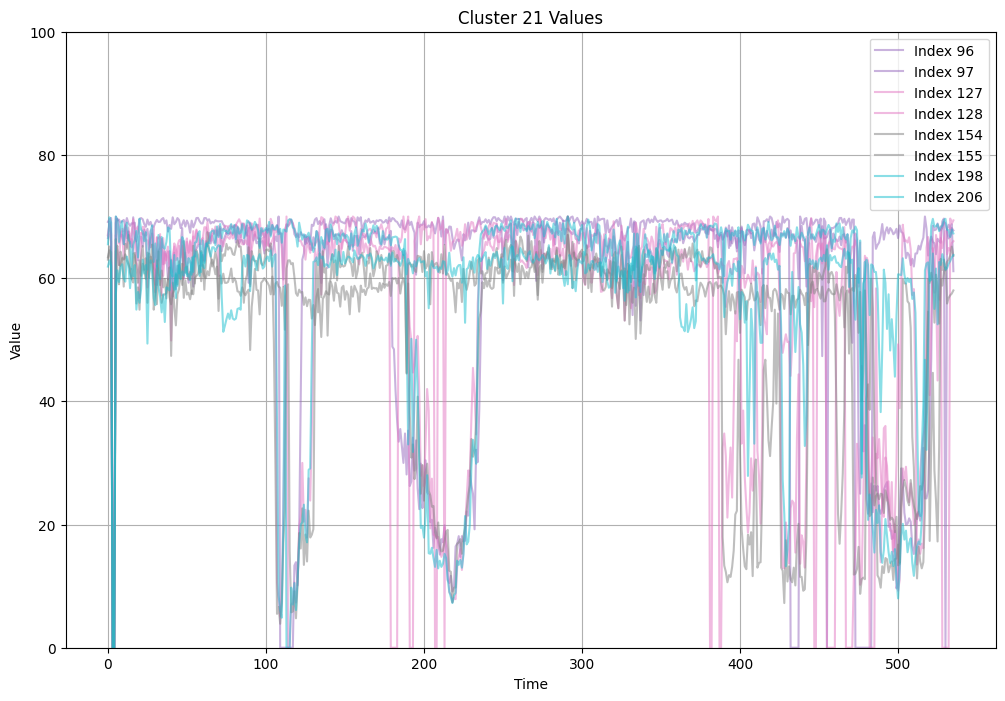

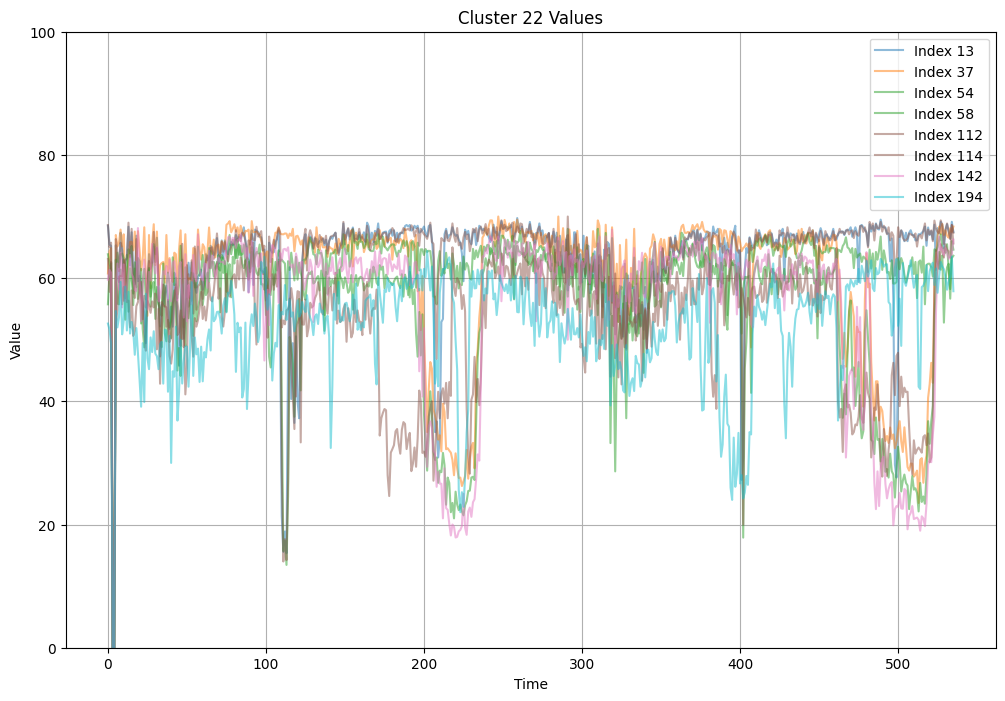

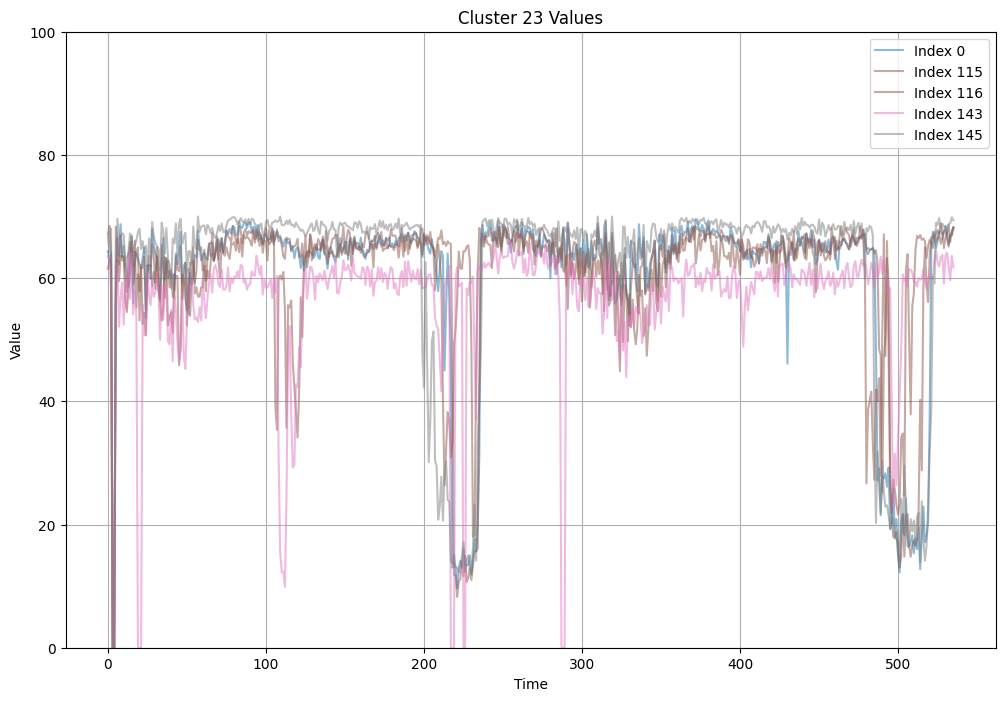

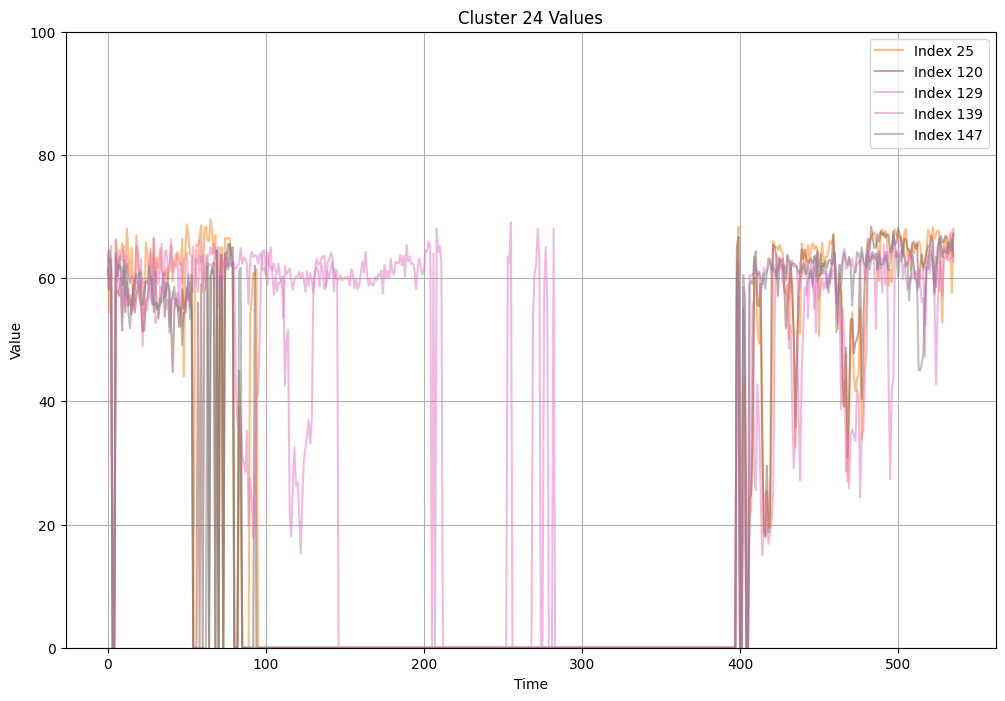

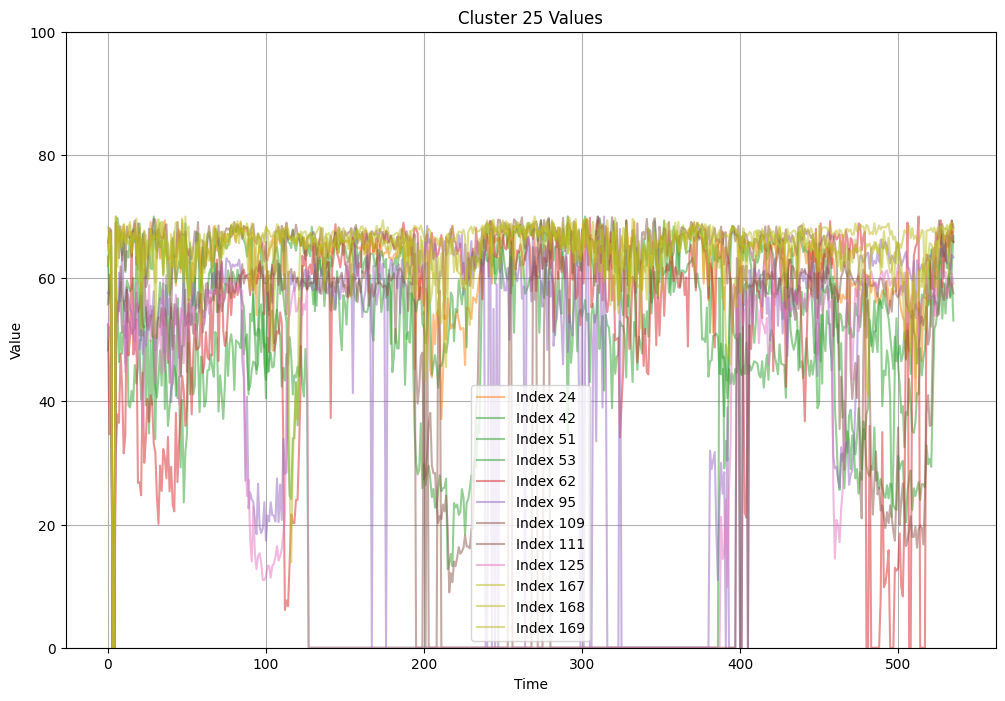

In [35]:
plot_graphs_by_cluster(np.array_split(df, 64)[0], clusters, num_clusters)